In [2]:
!pip install torchvision
!pip install opencv-python-headless


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# 데이터 경로 설정
dataset_path = '/content/drive/MyDrive/dataset/img/case1'


Mounted at /content/drive


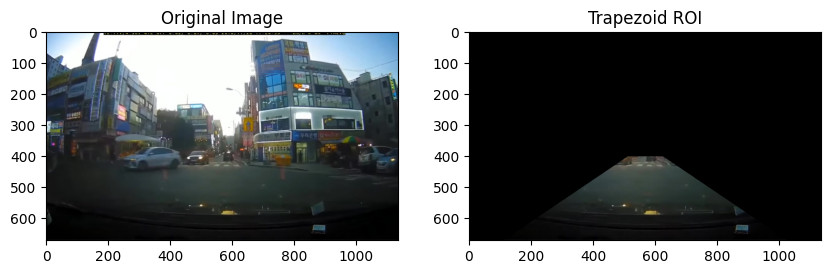

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_trapezoid(image, vertices):
    # vertices: 사다리꼴 영역의 꼭짓점 좌표 (numpy 배열)
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, [vertices], (255, 255, 255))
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

# 예시 데이터 로드
image_path = f'{dataset_path}/001.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 사다리꼴 영역 정의 (이미지 크기에 따라 조정)
height, width = image.shape[:2]
vertices = np.array([
    [int(0.1 * width), height],
    [int(0.45 * width), int(0.6 * height)],
    [int(0.55 * width), int(0.6 * height)],
    [int(0.9 * width), height]
], np.int32)

# 사다리꼴 그리기
trapezoid_image = draw_trapezoid(image, vertices)

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("Trapezoid ROI")
plt.imshow(trapezoid_image)
plt.show()
